# 1)Loading the scikit-learn version of the diabetes dataset

In [4]:
import numpy as np
import math
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


# 2)Splitting the dataset into the training and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(diabetes['data'],diabetes['target'],random_state=1402)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# 3) Finding the Training and Test R^2 for the Lasso model

In [6]:
#importing the Lassso Model
from sklearn.linear_model import Lasso       
#fitting the data to the model
a = Lasso().fit(X_train,y_train)

train = a.score(X_train,y_train)
test = a.score(X_test,y_test)
print("Training R^2 = ",train) 
print("Test R^2 = ",test)

#count of features
count = np.sum(a.coef_ != 0)
print("number of features  = ",count)

#name of features
index = np.argwhere(a.coef_ != 0)
names = np.array(diabetes['feature_names'])[index]
print("Features are :",(names.transpose()))

Training R^2 =  0.35336687649837306
Test R^2 =  0.33318547470650794
number of features  =  2
Features are : [['bmi' 's5']]


# 4) Loading the Orginal Diabetes Dataset

In [7]:
d = np.genfromtxt("diabetes.data",delimiter ="\t",skip_header =1)

# 5)Splitting the Dataset

In [8]:
original_data1 = np.genfromtxt("diabetes.data",delimiter ="\t",usecols = np.arange(d.shape[1]-1),skip_header = 1)
original_data2 = np.genfromtxt("diabetes.data",delimiter ="\t",usecols = d.shape[1]-1,dtype ='int' ,skip_header = 1)
X_train1,X_test1,y_train1,y_test1 = train_test_split(original_data1,original_data2,random_state = 1402)


# 6)Finding the Training and Test R^2 for the Dataset

In [9]:
a1 = Lasso().fit(X_train1,y_train1)
train1 = a1.score(X_train1,y_train1)
test1 = a1.score(X_test1,y_test1)
print('Training R^2 =',train1)
print('Test R^2 =',test1)


#finding the number of features
count = np.sum(a1.coef_ != 0)
print("number of features  = ",count)

#name of features
index = np.argwhere(a1.coef_ != 0)
names = np.array(diabetes['feature_names'])[index]
print("Features are :",(names.transpose()))






Training R^2 = 0.5066402866984465
Test R^2 = 0.4910967021200747
number of features  =  10
Features are : [['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']]


The Training and Test R^2 values of orginal data is large than that of the scikit Dataset.
In Excercise 3 we used only 2 features whereas in Excercise 6 we used all 10 Features,the reason for this is probably due to the normalized data in scikit dataset

# 7)Preprocessing the Training and Test sets using StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler    #importing StandardScaler
b = StandardScaler().fit(X_train1)                     
transformed_xtrain1 = b.transform(X_train1)          #Transforming the Train and Test Set
transformed_xtest1 = b.transform(X_test1)



# 8)Finding the Training and Test R^2 for the Preprocessed Dataset

In [11]:
a2 = Lasso().fit(transformed_xtrain1,y_train1)
train2 = a2.score(transformed_xtrain1,y_train1)
test2 = a2.score(transformed_xtest1,y_test1)
print("Training R^2 = ",train2) 
print("Test R^2 = ",test2)

#finding the number of features
count2 = np.sum(a2.coef_ != 0)
print("number of features in transformed data = ",count2)

#name of features
index = np.argwhere(a2.coef_ != 0)
names = np.array(diabetes['feature_names'])[index]
print("Features are :",(names.transpose()))



Training R^2 =  0.5106400004398055
Test R^2 =  0.5061630428354778
number of features in transformed data =  9
Features are : [['sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']]


The results of item 8 are closer to item 6 than item 3.it would be because the data from scikit would be normalized differently or irregularly.Another assumption would be the normalization techiniques used in both datasets are entirely different.Data snooping in item 3 is another possibility.

# 9)Finding the Test R^2 for the preprocessed Dataset with different Alphas

In [12]:

alp=[.002,.02,.2,2.00,20]
test = []
features = []
for a in alp:
    lasso = Lasso(a).fit(transformed_xtrain1,y_train1)
    test.append(lasso.score(transformed_xtest1,y_test1))
    features.append(np.sum(lasso.coef_ != 0))
for i in range(len(alp)):
    print("Alpha = ",alp[i],": Test R^2 = ",test[i],"\t Features  = ",features[i])
    

Alpha =  0.002 : Test R^2 =  0.5061781500630911 	 Features  =  10
Alpha =  0.02 : Test R^2 =  0.5053452442769313 	 Features  =  10
Alpha =  0.2 : Test R^2 =  0.5042386288174174 	 Features  =  9
Alpha =  2.0 : Test R^2 =  0.503453694444169 	 Features  =  7
Alpha =  20 : Test R^2 =  0.34491410045359483 	 Features  =  2


b) plotting the test R2 vs the number of features used

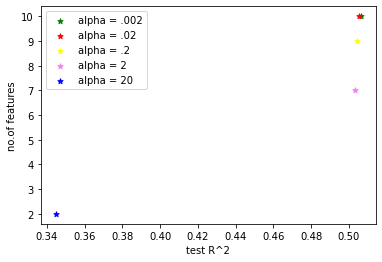

In [13]:
import matplotlib.pyplot as plt
plt.scatter(test[0], features[0], label= "alpha = .002", color= "green",marker= "*", s=30)
plt.scatter(test[1], features[1], label= "alpha = .02", color= "red",marker= "*", s=30)
plt.scatter(test[2], features[2], label= "alpha = .2", color= "yellow",marker= "*", s=30)
plt.scatter(test[3], features[3], label= "alpha = 2", color= "violet",marker= "*", s=30)
plt.scatter(test[4], features[4], label= "alpha = 20", color= "blue",marker= "*", s=30)
plt.xlabel('test R^2')
plt.ylabel('no.of features')
plt.legend()

# 10)Using Cross Validation Finding the Best Regularization parameter

In [30]:
from sklearn.model_selection import cross_val_score  #importing cross validation
best_score = 0
for alphas in [.002,.02,.2,2,20]:
        a = Lasso(alphas).fit(transformed_xtrain1,y_train1)
        scores = cross_val_score(a,transformed_xtrain1,y_train1, cv=5)    
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_alpha = alphas
print("Best parameters  alpha :",  best_alpha)

Best parameters  alpha : 0.2


b)Finding the Training and Test R^2 using best_alpha

In [13]:
a = Lasso(best_alpha).fit(transformed_xtrain1,y_train1)
trainscore = a.score( transformed_xtrain1,y_train1)
print("Best parameter Train score : ",trainscore)
testscore = a.score(transformed_xtest1,y_test1)
print("Best parameter Test score : ",testscore)
features = np.sum(lasso.coef_ != 0)
print("features used : ",features)

Best parameter Train score :  0.5132143395460341
Best parameter Test score :  0.5042386288174174
features used :  2


# 11)Inductive Conformal Predictor

a) Splitting the Data

In [33]:
#splitting training sets into proper and calibration sets
X_prop,X_cal,y_prop,y_cal = train_test_split(X_train1,y_train1,test_size = 99,random_state = 1402)

11 b) Preprocessing the Data

In [42]:
from sklearn.preprocessing import StandardScaler  
#doing transformation in training set
b=StandardScaler()
b.fit(X_prop)
#To avoid data snooping
transformed_Xprop = b.transform(X_prop)
transformed_Xcal = b.transform(X_cal)
transformed_Xtest = transformed_xtest1



11 c)Finiding yhat and the Non-Confirmity Scores

In [69]:
from sklearn.model_selection import cross_val_score  #importing cross validation
best_score3 = 0
for alphas in [.002,.02,.2,2,20]:
        a3 = Lasso(alphas).fit(transformed_Xprop,y_prop)
        scores = cross_val_score(a3,transformed_Xprop,y_prop, cv=5)    
        score = np.mean(scores)
        if score > best_score3:
            best_score3 = score
            best_alpha3 = alphas
print("Best parameters  alpha :",  best_alpha3)


#making prediction(yhat)
a = Lasso(best_alpha3).fit(transformed_Xprop,y_prop)
yhat = a.predict(transformed_Xcal)
non_confirmity = abs( y_cal - yhat)  #nonconfirmity scores



Best parameters  alpha : 2


In [72]:
#computing k  for significance level 5% and 20%
import math
def k(epsilon,m):
    return (math.ceil((1-epsilon)*(m+1)))
l = len(transformed_Xcal)
k5=k(5/100,l)
k2=k(20/100,l)
print("k for 5% significane level :",k5)
print("k for 20% significane level :",k2)

k for 5% significane level : 95
k for 20% significane level : 80


In [73]:
#computing c  for significance level 5% and 20%
def c(k,a):
    return a[k-1]
a = np.sort(non_confirmity)
print("c for 5% significane level :",c(k5,a))
print("c for 20% significane level :",c(k2,a))

c for 5% significane level : 102.4647196301488
c for 20% significane level : 72.8308458728351
